In [1]:
import os
import nltk
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Import matplotlib for visualization
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from keras.callbacks import History  # Import History for recording model training history
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
import os
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from nltk.stem import PorterStemmer
import joblib
from sklearn.linear_model import LogisticRegression
import re
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb



In [2]:

# Set the path to the directory containing the positive and negative reviews
dir_path = "txt_sentoken"

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Define custom list of stopwords with negations
    custom_stop_words = {'but', 'isn', 'don', 'hasn', 'haven', 'shouldn', 'wasn', 'weren', 'won', 'wouldn', 'no', 'not', 'nor', 'ain'}

    # Remove punctuation, non-alphabetic characters, and exclude custom stopwords
    tokens = [re.sub(r'[^\w\s]', '', word.lower()) for word in tokens if word.isalpha() and word.lower() not in custom_stop_words]

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    return " ".join(tokens)

# Read the positive and negative reviews
pos_files = os.listdir(os.path.join(dir_path, 'pos'))
neg_files = os.listdir(os.path.join(dir_path, 'neg'))

pos_reviews = []
neg_reviews = []

for file in pos_files:
    with open(os.path.join(dir_path, 'pos', file), 'r') as f:
        pos_reviews.append(preprocess_text(f.read()))

for file in neg_files:
    with open(os.path.join(dir_path, 'neg', file), 'r') as f:
        neg_reviews.append(preprocess_text(f.read()))

# Create labels
pos_labels = [1] * len(pos_reviews)
neg_labels = [0] * len(neg_reviews)

# Combine positive and negative reviews and labels
all_reviews = pos_reviews + neg_reviews
all_labels = pos_labels + neg_labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_reviews, all_labels, test_size=0.15, random_state=42,shuffle=True)

# Convert text data to TF-IDF features with additional parameters
vectorizer = TfidfVectorizer(max_features=5000, sublinear_tf=True, ngram_range=(1, 4))

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)



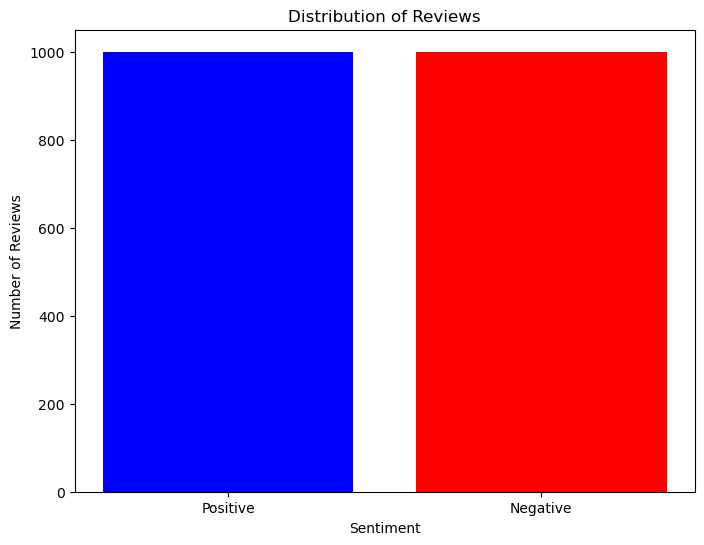

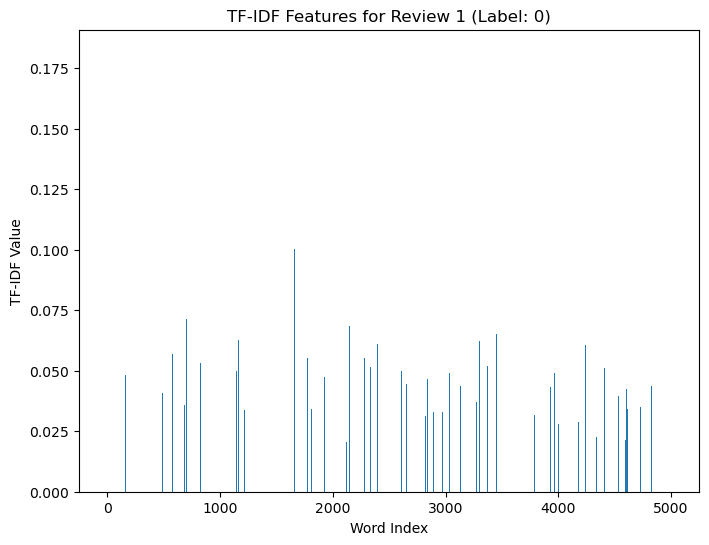

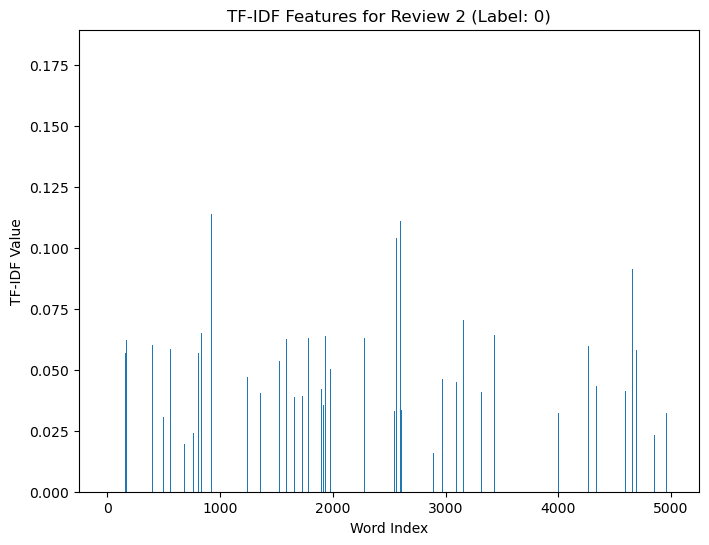

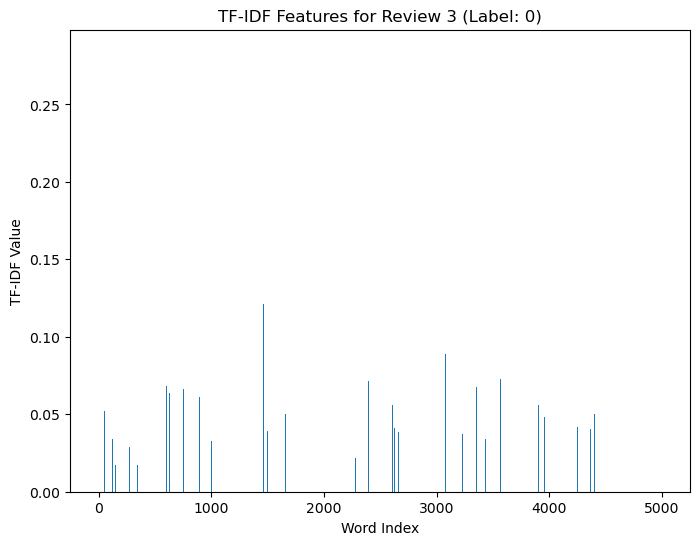

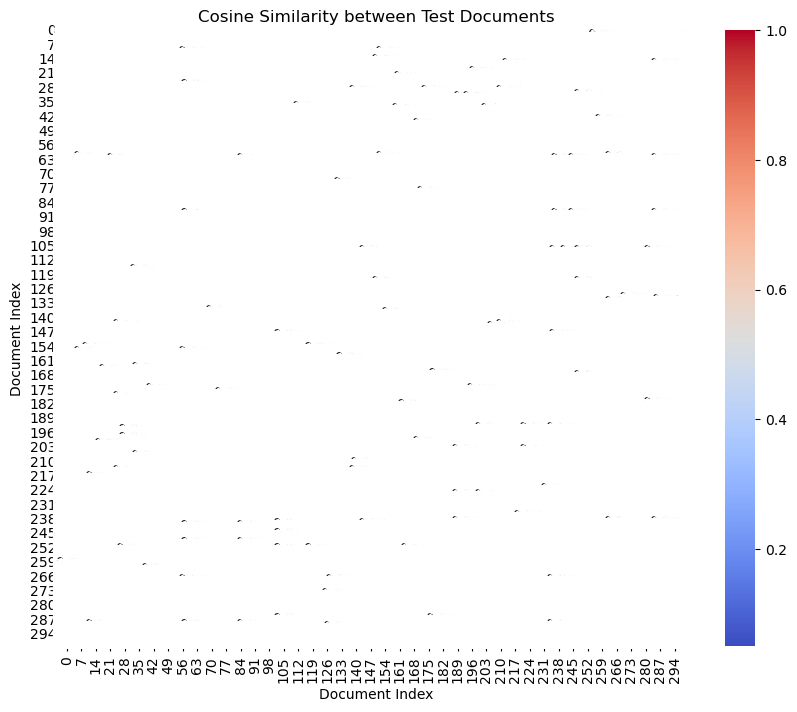

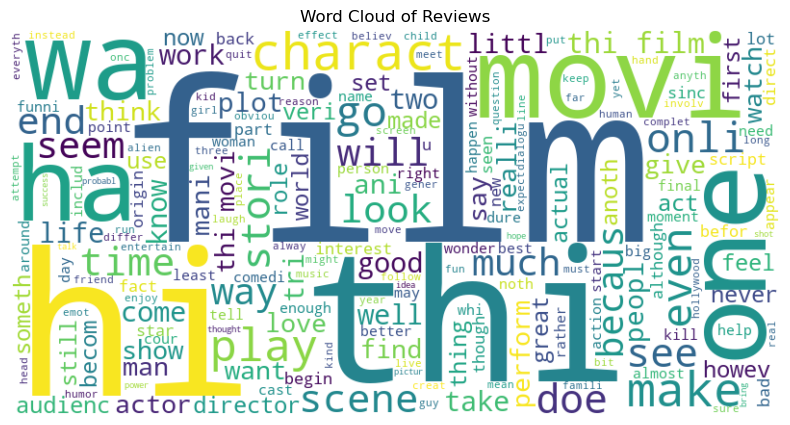

In [27]:
import matplotlib.pyplot as plt

# Count the number of positive and negative reviews
num_pos_reviews = len(pos_reviews)
num_neg_reviews = len(neg_reviews)

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Positive', 'Negative'], [num_pos_reviews, num_neg_reviews], color=['blue', 'red'])
plt.title('Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

###################################################

# Randomly select a few reviews
random_indices = random.sample(range(len(all_reviews)), 3)
random_reviews = [all_reviews[i] for i in random_indices]
random_labels = [all_labels[i] for i in random_indices]

# Transform the selected reviews to TF-IDF features
random_reviews_tfidf = vectorizer.transform(random_reviews)

# Convert TF-IDF features to dense array for plotting
dense_tfidf = random_reviews_tfidf.todense()

# Plot the TF-IDF features for each review
for i, review_tfidf in enumerate(dense_tfidf):
    plt.figure(figsize=(8, 6))
    plt.bar(range(len(review_tfidf.tolist()[0])), review_tfidf.tolist()[0])
    plt.title(f'TF-IDF Features for Review {i+1} (Label: {random_labels[i]})')
    plt.xlabel('Word Index')
    plt.ylabel('TF-IDF Value')
    plt.show()

###################################################

from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

# Compute cosine similarity matrix between all pairs of documents
cos_sim_matrix = cosine_similarity(X_test_tfidf)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cos_sim_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Cosine Similarity between Test Documents')
plt.xlabel('Document Index')
plt.ylabel('Document Index')
plt.show()

###################################################
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the reviews into a single string
all_text = ' '.join(all_reviews)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()


In [7]:
# Logistic Regression

# # Define and train the Logistic Regression classifier
logistic_regression = LogisticRegression(max_iter=12, C=2.5)
logistic_regression.fit(X_train_tfidf, y_train)

y_train_pred = logistic_regression.predict(X_train_tfidf)

# # Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy * 100)

# # Save the trained model to a file
model_filename = 'logistic_regression_model.pkl'
joblib.dump(logistic_regression, model_filename)
print(f"Trained model saved as '{model_filename}'")

# # Make predictions
y_pred = logistic_regression.predict(X_test_tfidf)

# # Evaluate the model
print("test Accuracy:", accuracy_score(y_test, y_pred) * 100)
print("Classification Report:")
print(classification_report(y_test, y_pred))
#test Accuracy: 86 %


Training Accuracy: 97.47058823529412
Trained model saved as 'logistic_regression_model.pkl'
test Accuracy: 86.0
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       151
           1       0.86      0.85      0.86       149

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
pip install joblib


In [22]:
import joblib

# Load the saved model
loaded_model = joblib.load('logistic_regression_model.pkl')

# Make predictions
y_pred_loaded = loaded_model.predict(X_test_tfidf)

# Evaluate the model
print("Test Accuracy with loaded model:", accuracy_score(y_test, y_pred_loaded) * 100)
print("Classification Report with loaded model:")
print(classification_report(y_test, y_pred_loaded))


Test Accuracy with loaded model: 86.0
Classification Report with loaded model:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       151
           1       0.86      0.85      0.86       149

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



In [9]:
#this code to solve the  ConvergenceWarning in previous with max_iter=200, C=1.0, and solver='liblinear'


# Define and train the Logistic Regression classifier
#logistic_regression = LogisticRegression(max_iter=200, C=1.0, solver='liblinear')
#logistic_regression.fit(X_train_tfidf, y_train)


# Make predictions on the training set
#y_train_pred = logistic_regression.predict(X_train_tfidf)

# Calculate training accuracy
#train_accuracy = accuracy_score(y_train, y_train_pred)
#print("Training Accuracy:", train_accuracy * 100)

# Make predictions on the test set
#y_pred = logistic_regression.predict(X_test_tfidf)

# Evaluate the model
#print("Test Accuracy:", accuracy_score(y_test, y_pred) * 100)
#print("Classification Report:")
#print(classification_report(y_test, y_pred))

Training Accuracy: 96.29411764705881
Test Accuracy: 83.33333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       151
           1       0.83      0.84      0.83       149

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



Confusion Matrix:
[[125  26]
 [ 24 125]]


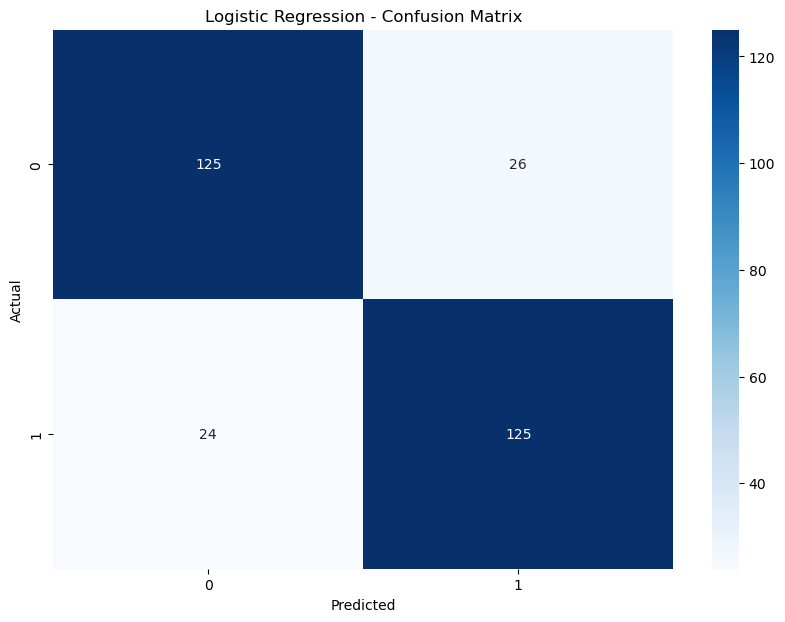

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [11]:

# Support Vector Machine


# # Train a Support Vector Machine (SVM) classifier
svm_classifier =SVC(kernel='linear', C=2.4)
svm_classifier.fit(X_train_tfidf, y_train)

model_filename = 'Support_Vector_classifier_model.pkl'
joblib.dump(svm_classifier, model_filename)
print(f"Trained Support Vector classifier model saved as '{model_filename}'")
# # Make predictions on the training set
y_train_pred = svm_classifier.predict(X_train_tfidf)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy * 100)

# # Make predictions on the test set
y_test_pred = svm_classifier.predict(X_test_tfidf)

# # Evaluate the model on the test set
print("Test Accuracy:", accuracy_score(y_test, y_test_pred) * 100)
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
# test Accuracy: 85 %



Trained Support Vector classifier model saved as 'Support_Vector_classifier_model.pkl'
Training Accuracy: 99.88235294117646
Test Accuracy: 86.0
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       151
           1       0.85      0.87      0.86       149

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



In [23]:
import joblib
from sklearn.metrics import accuracy_score, classification_report

# Load the saved model
loaded_model = joblib.load('Support_Vector_classifier_model.pkl')

# Make predictions on new data (X_test_tfidf)
y_pred_loaded = loaded_model.predict(X_test_tfidf)

# Evaluate the model
print("Test Accuracy with loaded model:", accuracy_score(y_test, y_pred_loaded) * 100)
print("Classification Report with loaded model:")
print(classification_report(y_test, y_pred_loaded))


Test Accuracy with loaded model: 86.0
Classification Report with loaded model:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       151
           1       0.85      0.87      0.86       149

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



Confusion Matrix:
[[129  22]
 [ 20 129]]


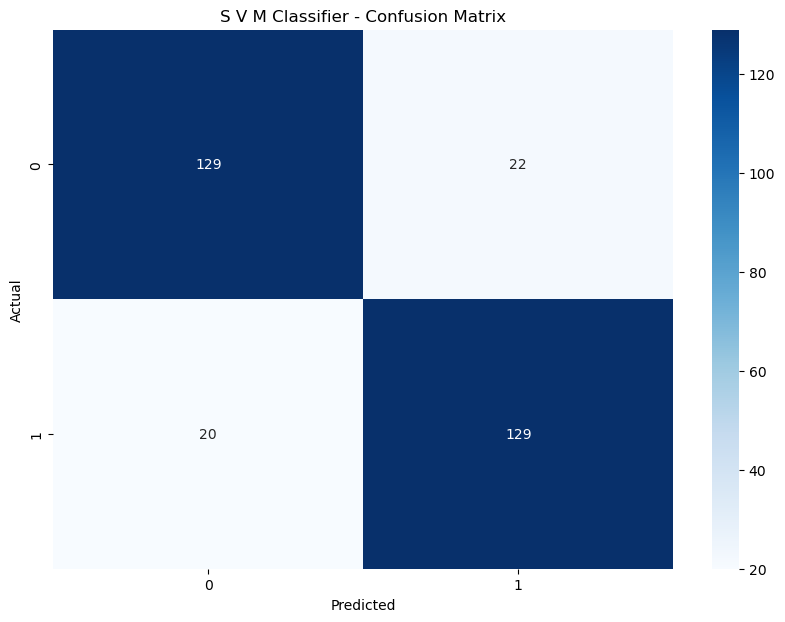

In [12]:
# Compute the confusion matrix
cm_rf = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm_rf)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('S V M Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [14]:

# RandomForestClassifier


# # Define and train the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
rf_classifier.fit(X_train_tfidf, y_train)

# # # Save the trained model to a file
model_filename = 'random_forest_classifier_model.pkl'
joblib.dump(rf_classifier, model_filename)
print(f"Trained Random Forest classifier model saved as '{model_filename}'")

# # Make predictions
y_pred = rf_classifier.predict(X_test_tfidf)
y_pred_train = rf_classifier.predict(X_train_tfidf)

# # Evaluate the model
print("test Accuracy:", accuracy_score(y_test, y_pred) * 100)
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("train Accuracy:", accuracy_score(y_train, y_pred_train) * 100)
print("Classification Report:")
print(classification_report(y_train, y_pred_train))

# test Accuracy: 81 %



Trained Random Forest classifier model saved as 'random_forest_classifier_model.pkl'
test Accuracy: 81.33333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       151
           1       0.83      0.79      0.81       149

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300

train Accuracy: 99.6470588235294
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       849
           1       0.99      1.00      1.00       851

    accuracy                           1.00      1700
   macro avg       1.00      1.00      1.00      1700
weighted avg       1.00      1.00      1.00      1700



In [24]:
import joblib

# Load the saved model
loaded_rf_model = joblib.load('random_forest_classifier_model.pkl')

# Make predictions on the test set
y_pred_loaded = loaded_rf_model.predict(X_test_tfidf)


# Evaluate the model on the test set
print("Test Accuracy with loaded model:", accuracy_score(y_test, y_pred_loaded) * 100)
print("Classification Report with loaded model:")
print(classification_report(y_test, y_pred_loaded))


Test Accuracy with loaded model: 81.33333333333333
Classification Report with loaded model:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       151
           1       0.83      0.79      0.81       149

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



Confusion Matrix:
[[124  27]
 [ 40 109]]


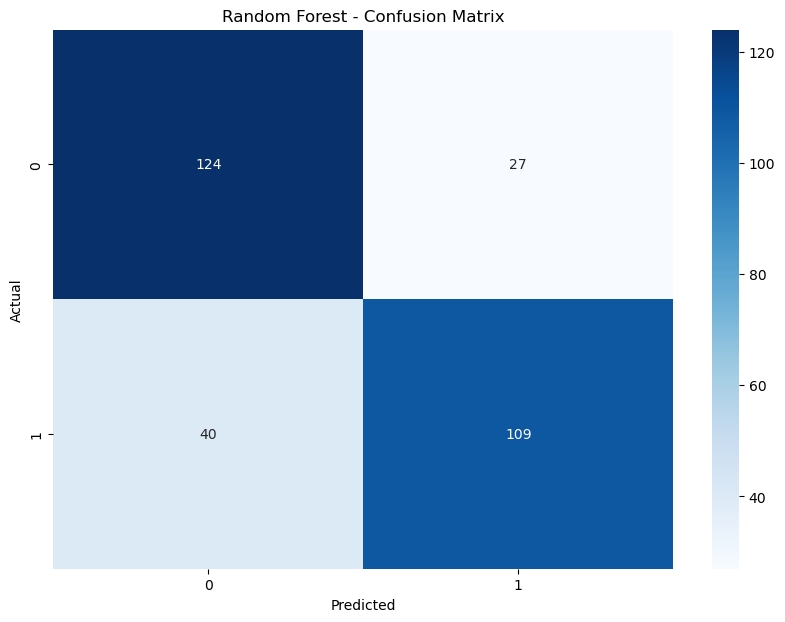

In [15]:
# Compute the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(cm_rf)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:

# Gradient Boosting Machine


# # Train a Gradient Boosting Machine (GBM) classifier
gbm_classifier = xgb.XGBClassifier(max_depth=10)
gbm_classifier.fit(X_train_tfidf, y_train)

model_filename = 'Gradient_Boosting_classifier_model.pkl'
joblib.dump(gbm_classifier, model_filename)
print(f"Trained Gradient Boosting classifier model saved as '{model_filename}'")
# # Make predictions
y_pred_test = gbm_classifier.predict(X_test_tfidf)
y_pred_train = gbm_classifier.predict(X_train_tfidf)

# # Evaluate the model
print("test Accuracy:", accuracy_score(y_test, y_pred_test) * 100)
print("Classification Report:")
print(classification_report(y_test, y_pred_test))


print("train Accuracy:", accuracy_score(y_train, y_pred_train) * 100)
print("Classification Report:")
print(classification_report(y_train, y_pred_train))
# test Accuracy: 80 %


Trained Gradient Boosting classifier model saved as 'Gradient_Boosting_classifier_model.pkl'
test Accuracy: 79.66666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.81      0.78      0.79       149

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300

train Accuracy: 100.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       849
           1       1.00      1.00      1.00       851

    accuracy                           1.00      1700
   macro avg       1.00      1.00      1.00      1700
weighted avg       1.00      1.00      1.00      1700



In [25]:
import joblib
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# Load the saved model
loaded_gbm_model = joblib.load('Gradient_Boosting_classifier_model.pkl')

# Make predictions on the test set
y_pred_test_loaded = loaded_gbm_model.predict(X_test_tfidf)

# Evaluate the model on the test set
print("Test Accuracy with loaded model:", accuracy_score(y_test, y_pred_test_loaded) * 100)
print("Classification Report with loaded model:")
print(classification_report(y_test, y_pred_test_loaded))


Test Accuracy with loaded model: 79.66666666666666
Classification Report with loaded model:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.81      0.78      0.79       149

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300



Confusion Matrix:
[[123  28]
 [ 33 116]]


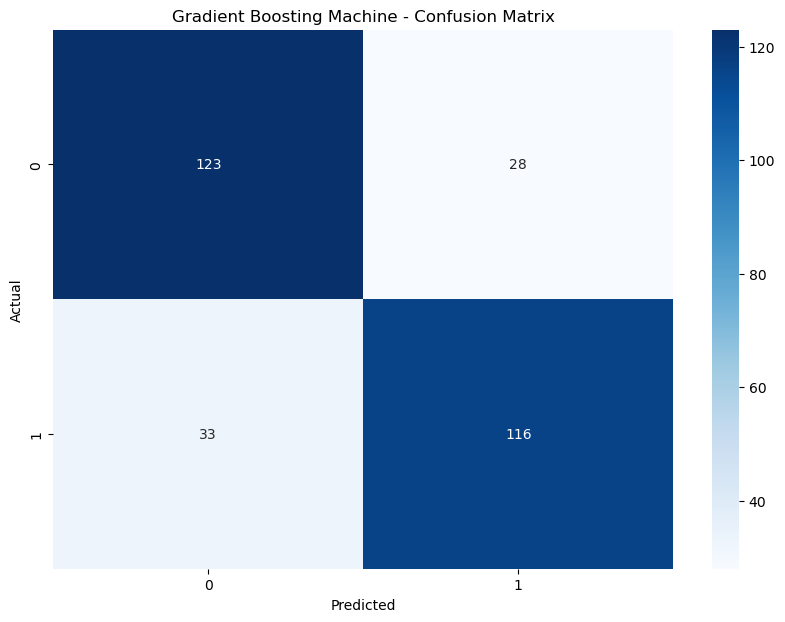

In [17]:
# Compute the confusion matrix
cm_GBM = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm_GBM)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm_GBM, annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting Machine - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [26]:


#Preprocess the new text data
new_text = preprocess_text('''the american action film has been slowly drowning to death in a sea of asian wire-fu copycats .
it's not a pretty death , and it's leaving the likes of schwartznager , stallone , and van damme wearing cement galoshes at the bottom of a kung fu sea .
sometimes , the mix results in a mind-blowing spectacle unlike any other .
quality action with amazing and exciting stunt work , as in 1999's the matrix , can be a real gem .
but too often hollywood gets it wrong , even when they pay off chinese directors .
flying ninjas and floating karate masters have been replaced by soaring bronx detectives and slow motion kicking scientists .
mostly it's laughable .
in hollywood's rush to emulate the success of the matrix , trademark asian stunt choreography has become more of a joke than an art form .
but iron monkey , the latest asian import , shows us how to get it right .
iron monkey ( actually a reissue of a 1993 film ) is the story of a 19th chinese vigilante ( rongguang yu ) , fighting with his own unique style of shaolin kung fu for the rights of the oppressed and the bellies of the hungry .
but it is also a piece of the narrative of legendary chinese film hero wong fei-hong , most recently seen in one of the most overlooked , and possibly best films of 2000 , drunken master 2 ( released in the u . s . as the legend of drunken master ) .
unlike drunken master 2 , which stars jackie chan as an adult fei-hong , iron monkey finds a much younger fei-hong ( sze-man tsang ) and his father wong kei-ying ( yen chi dan ) thrust into the middle of iron monkey's fight against oppression .
iron monkey succeeds as no kung fu film since drunken master 2 . at times , fighting styles , especially that of monkey himself , do devolve into the ridiculous twinkle-toed floating of films like crouching tiger , hidden dragon , director yuen wo ping eventually remembers to bring his action scenes back to earth .
iron monkey is at its heart a hardcore , kung fu action film rather than any kind of drama a la crouching tiger .
however , there are brief moments of profoundness shared between characters , such as those that pass between our outlaw hero and his good-hearted but misguided enemy , chief fox .
in those moments , and in others , iron monkey manages to transcend its mindless kung fu nature to touch the hearts and minds of its audience .
while in no way the equal of a masterpiece like drunken master 2 , iron monkey dances quite nicely to the invading kung fu tune .
aka siunin wong fei-hung tsi titmalau .
''')

# Convert the preprocessed text to TF-IDF features using the same vectorizer
new_text_tfidf = vectorizer.transform([new_text])

# Make predictions using the trained models
# For example, with Logistic Regression
logistic_regression = joblib.load('logistic_regression_model.pkl')
logistic_pred = logistic_regression.predict(new_text_tfidf)

# Similarly, you can load and use other trained models
# For example, with Support Vector Machine
svm_classifier = joblib.load('Support_Vector_classifier_model.pkl')
svm_pred = svm_classifier.predict(new_text_tfidf)

# For Random Forest Classifier
rf_classifier = joblib.load('random_forest_classifier_model.pkl')
rf_pred = rf_classifier.predict(new_text_tfidf)

# For Gradient Boosting Machine
gbm_classifier = joblib.load('Gradient_Boosting_classifier_model.pkl')
gbm_pred = gbm_classifier.predict(new_text_tfidf)

# Print predictions
print("Logistic Regression Prediction:", logistic_pred)
print("SVM Prediction:", svm_pred)
print("Random Forest Prediction:", rf_pred)
print("Gradient Boosting Prediction:", gbm_pred)


Logistic Regression Prediction: [1]
SVM Prediction: [1]
Random Forest Prediction: [1]
Gradient Boosting Prediction: [1]


In [29]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical



# Tokenize and pad sequences for training set
max_words = 1000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_words)

y_train_cat = to_categorical(y_train)

# Define LSTM model
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_words))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model and record the history
history = History()
model.fit(X_train_pad, y_train_cat, epochs=20, batch_size=32, validation_split=0.1, callbacks=[history])


Epoch 1/20
48/48 [==============================] - 223s 4s/step - loss: 0.6842 - accuracy: 0.5431 - val_loss: 0.6563 - val_accuracy: 0.6412
Epoch 2/20
48/48 [==============================] - 206s 4s/step - loss: 0.6216 - accuracy: 0.6961 - val_loss: 0.6157 - val_accuracy: 0.6294
Epoch 3/20
48/48 [==============================] - 209s 4s/step - loss: 0.5515 - accuracy: 0.7386 - val_loss: 0.6321 - val_accuracy: 0.6647
Epoch 4/20
48/48 [==============================] - 209s 4s/step - loss: 0.4768 - accuracy: 0.8007 - val_loss: 0.5675 - val_accuracy: 0.7176
Epoch 5/20
48/48 [==============================] - 208s 4s/step - loss: 0.3093 - accuracy: 0.8739 - val_loss: 0.5180 - val_accuracy: 0.7706
Epoch 6/20
48/48 [==============================] - 214s 4s/step - loss: 0.2169 - accuracy: 0.9163 - val_loss: 0.6145 - val_accuracy: 0.7294
Epoch 7/20
48/48 [==============================] - 208s 4s/step - loss: 0.1632 - accuracy: 0.9431 - val_loss: 0.5839 - val_accuracy: 0.7294
Epoch 8/20
48

In [30]:

# Tokenize and pad sequences for test set
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_words)


# Evaluate the model on training set
train_loss, train_accuracy = model.evaluate(X_train_pad, y_train_cat, verbose=0)
print("Training Accuracy:", train_accuracy * 100, "%")

# Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(X_test_pad, to_categorical(y_test), verbose=0)
print("Test Accuracy:", test_accuracy * 100, "%")

#Training Accuracy: 97.35293984413147 %
#Test Accuracy: 73.00000190734863 %


Training Accuracy: 97.35293984413147 %
Test Accuracy: 73.00000190734863 %


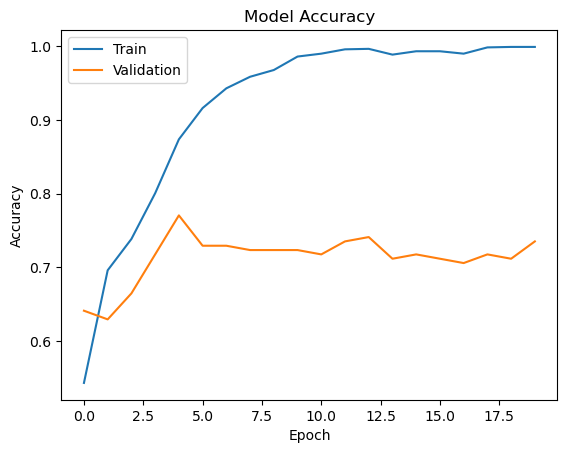

In [31]:

# Visualize training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [32]:
# Print samples from test dataset with original and predicted outputs
num_samples_to_print = 5  # Number of samples to print

print("Samples from Test Dataset with Original and Predicted Outputs:")
for i in range(num_samples_to_print):
    # Get a random index from the test set
    idx = random.randint(0, len(X_test) - 1)
    # Get the original review and its label
    original_review = X_test[idx]
    original_label = y_test[idx]
    # Tokenize and pad the sequence
    sequence = tokenizer.texts_to_sequences([original_review])
    padded_sequence = pad_sequences(sequence, maxlen=max_words)
    # Predict the class
    predicted_class = np.argmax(model.predict(padded_sequence), axis=-1)[0]
    # Map the labels to their respective sentiment
    original_sentiment = "Positive" if original_label == 1 else "Negative"
    predicted_sentiment = "Positive" if predicted_class == 1 else "Negative"
    # Print the results
    print(f"Original Review ({original_sentiment}):")
    print(original_review)
    print(f"Predicted Sentiment: {predicted_sentiment}")
    print("-------------------------")


Samples from Test Dataset with Original and Predicted Outputs:
1/1 [==============================] - 1s 613ms/step
Original Review (Positive):
event event upon u people waited year prequel star war fan camping theater month get ticket see think america ever actually recover hurricane film caused bit exaggeration say highly anticipated movie history anyone tell movie either lying clueless clearly obvious waiting hype actually seeing movie anticlimactic second coming lord could live kind buzz far weak word star war epsode phantom menace effortlessly generated mean film bad fact terrific strongly suspect many people dissappointed simply surrendered medium machine inevitable backlash set decade event original star war took place film focus fledgling republic planet conflict raging trade federation angry tax raise recently put place invaded small peaceful planet naboo republic sent two jedi knight people actively communicate affectionately known force jinni liam neeson kenobi ewan mcgregor

1/1 [==============================] - 0s 185ms/step
Original Review (Negative):
plot rich psychiatrist great home life get cute daughter kidnapped bad guy want extract information mind one nutty patient course patient cooperative doctor hour comply demand kill daughter pretty good premise critique fan movie packed plot hole inconsistency yes even plot hole heed word skip hollow thriller like saying either since film actually potential started pretty well sure story basically amalgamation ransom primal fear nick time pureed one whole psychiatrist working clock thing actually engaged first halfway mark movie bottom drop left lot question plausible answer get overly smart kid manages pull one bad guy get weak woman leg cast beating crap tough bad guy get douglas character new york uppedity psychiatrist suddenly turning action hero move attitude boot film main plot point would bad guy still give crap thing year even would give shrink day end part waited year another day set another heist 

10/10 [==============================] - 2s 192ms/step


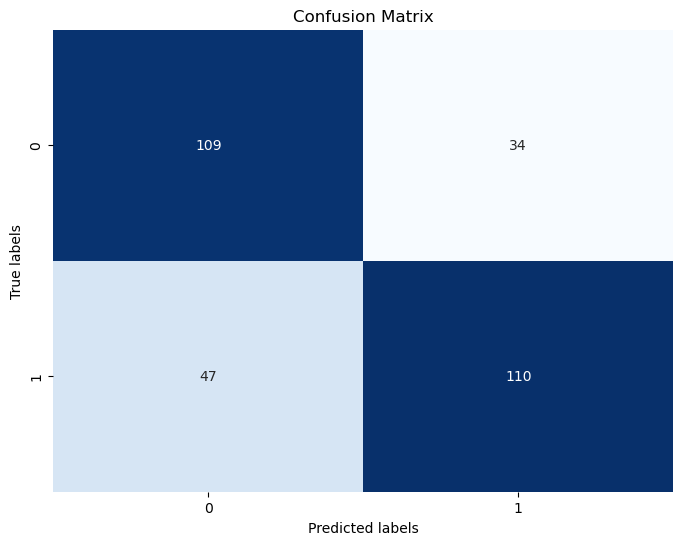

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.76      0.73       143
           1       0.76      0.70      0.73       157

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.73      0.73      0.73       300



In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns  # Import Seaborn for visualization

# Predict on test set
y_pred = model.predict(X_test_pad)
# Convert probabilities to binary predictions
y_pred_binary = np.argmax(y_pred, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
class_report = classification_report(y_test, y_pred_binary)
print("Classification Report:\n", class_report)


In [ ]:

# Save the model
model.save('lstm_sentiment_analysis_model.h5')

In [16]:
# Load the saved model
loaded_model = load_model('lstm_sentiment_analysis_model.h5')

# Evaluate the loaded model on training set
train_loss, train_accuracy = loaded_model.evaluate(X_train_pad, y_train_cat, verbose=0)
print("Training Accuracy:", train_accuracy * 100, "%")

# Evaluate the loaded model on test set
test_loss, test_accuracy = loaded_model.evaluate(X_test_pad, to_categorical(y_test), verbose=0)
print("Test Accuracy:", test_accuracy * 100, "%")


Training Accuracy: 91.88235402107239 %
Test Accuracy: 74.00000095367432 %
